# Analizing the Property Data,

In [1]:
# Import the pandas
import pandas as pd

In [45]:
# First we are going to read the Data file
data = pd.read_csv('property-data.csv')

In [4]:
# here can see the rows and columns of our dataset we have
# there are 168446 Rows 
# and Total of 17 Columns
data.shape

(168446, 17)

In [5]:
# A little deep analysis for our available fields in the Data.
# Take note that we have date_added as an object which we have to convert to datetime.
# Also tow good fileds for Latitude and Longitute are available to check the location.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
dtypes: float64(2), int64(5), obje

In [6]:
# Notice that columns which are not important to us at this analysis so we are going to remove them 
data.drop(['page_url', 'agency', 'agent'], axis=1, inplace=True)

In [7]:
# One more important thing Always consider that our data should not contains the duplicate values.
# Our Analysis will no worth we analise one property twice.
data.duplicated('property_id').sum()

0

In [8]:
# Now we will check the numeric values a very quic way pandas offers us as 
# Here you can see the some statistic mean, count, min , maxium, Standard Divation and Quarntile 
data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000


In [9]:
# Humman brains are good at catagorise and compare so let us look some counts
# Here we can the the the properties for Rent and Sales are very different and we should consider them seperatly
data.purpose.value_counts()

For Sale    120655
For Rent     47791
Name: purpose, dtype: int64

In [10]:
# So now we understand that our dataset has two major classes Rent and Sale
# Here we are just wanted to confirm the 3 samples of each group under pupose tab Sales and Rent
data.groupby(['purpose']).sample(n=3, random_state=6)

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
72425,16275677,12970,Lower Portion,25000,Scheme 33,Karachi,Sindh,24.964886,67.175591,2,4.8 Marla,For Rent,2,5/19/2019
157354,17299857,764,Lower Portion,28000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,2,8 Marla,For Rent,3,7/15/2019
157219,17298829,174,Lower Portion,75000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,3,12 Marla,For Rent,3,7/15/2019
123569,17071698,1778,House,14800000,Bahria Town,Lahore,Punjab,31.389912,74.190488,6,10 Marla,For Sale,5,7/2/2019
13426,11747128,153,House,16000000,Walton Road,Lahore,Punjab,31.477098,74.357271,0,7.5 Marla,For Sale,6,8/7/2018
112994,17010468,3332,Flat,7000000,G-11,Islamabad,Islamabad Capital,33.675604,73.000367,2,4.9 Marla,For Sale,3,7/1/2019


In [11]:
# Now here we will look on 3 records of each purpose Category
# For Rent 3 properties and for For Sale 3 properties
data.groupby(['purpose']).sample(n=3, random_state=6)

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
72425,16275677,12970,Lower Portion,25000,Scheme 33,Karachi,Sindh,24.964886,67.175591,2,4.8 Marla,For Rent,2,5/19/2019
157354,17299857,764,Lower Portion,28000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,2,8 Marla,For Rent,3,7/15/2019
157219,17298829,174,Lower Portion,75000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,3,12 Marla,For Rent,3,7/15/2019
123569,17071698,1778,House,14800000,Bahria Town,Lahore,Punjab,31.389912,74.190488,6,10 Marla,For Sale,5,7/2/2019
13426,11747128,153,House,16000000,Walton Road,Lahore,Punjab,31.477098,74.357271,0,7.5 Marla,For Sale,6,8/7/2018
112994,17010468,3332,Flat,7000000,G-11,Islamabad,Islamabad Capital,33.675604,73.000367,2,4.9 Marla,For Sale,3,7/1/2019


In [12]:
# pandas groupby operations are very flexable and can perform the hevy lifting.
# here we are counting the Number 
data.groupby(['purpose', 'property_type'])['price'].count()

purpose   property_type
For Rent  Farm House          48
          Flat             10120
          House            17492
          Lower Portion     8225
          Penthouse          100
          Room               660
          Upper Portion    11146
For Sale  Farm House         609
          Flat             28118
          House            87976
          Lower Portion     1004
          Penthouse          295
          Room                25
          Upper Portion     2628
Name: price, dtype: int64

In [24]:
# Properties with there purpose cities and types 
data.groupby(['purpose','city', 'property_type'])['price'].count()

purpose   city        property_type
For Rent  Faisalabad  Flat                29
                      House             2336
                      Lower Portion      432
                      Room                93
                      Upper Portion      787
          Islamabad   Farm House          35
                      Flat              3167
                      House             8004
                      Lower Portion     4243
                      Penthouse           24
                      Room               369
                      Upper Portion     5478
          Karachi     Farm House          11
                      Flat              5722
                      House             3659
                      Lower Portion     1747
                      Penthouse           71
                      Room               126
                      Upper Portion     2479
          Rawalpindi  Farm House           2
                      Flat              1202
                   

In [16]:
# The most expensive properties in both groups Sales and Rent
data.groupby(['purpose', 'property_type'])['price'].max() # You can also use min() here for minium proerties.

purpose   property_type
For Rent  Farm House          2000000
          Flat                 488000
          House              12500000
          Lower Portion       2280000
          Penthouse            900000
          Room                 135000
          Upper Portion       1100000
For Sale  Farm House        884000000
          Flat              225000000
          House            2000000000
          Lower Portion      70000000
          Penthouse         150000000
          Room               90000000
          Upper Portion     375000000
Name: price, dtype: int64

<AxesSubplot:>

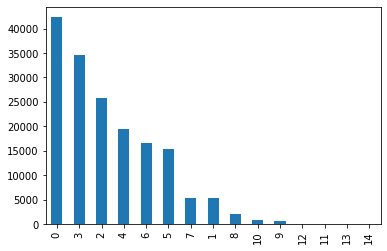

In [46]:
# some Charts
data.baths.value_counts().plot(kind='bar')

In [25]:
# To see only For Sale Properties.
df = data[data['purpose'] == 'For Sale']
df

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,4/5/2019
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,7/10/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,7/18/2019
168442,17355249,680,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,7/18/2019
168443,17355250,6757,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,7/18/2019
168444,17355251,6752,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,7/18/2019


In [27]:
# We can see the proerties for sale by there room which is 3 rooms are the highiest
df.value_counts('bedrooms')

bedrooms
3     31634
5     20201
2     19713
4     18665
0     13119
6      9713
1      2691
7      2419
8      1164
9       579
10      458
11      263
12       20
15        5
16        4
13        2
14        2
18        1
25        1
27        1
dtype: int64

In [29]:
df.groupby(['city', 'location', 'area'])['price'].count()

city        location           area     
Faisalabad  204 Chak Road      19 Marla     1
                               2.5 Marla    1
                               3.3 Marla    1
                               4.5 Marla    1
                               5 Marla      2
                                           ..
Rawalpindi  Yousaf Colony      5 Marla      4
                               7 Marla      4
            Zafar ul Haq Road  2.5 Marla    1
            Zeeshan Colony     6 Marla      2
                               8.5 Marla    1
Name: price, Length: 13516, dtype: int64

In [30]:
# Now we will see for Rent 
df = data[data['purpose'] == 'For Rent']

In [32]:
# The numper of rooms available for rent
df.value_counts('bedrooms')

bedrooms
3     14233
2     11028
0      9585
4      4362
5      3251
6      2216
1      1743
7       554
8       287
9       203
11      153
10      153
14        6
12        5
28        4
15        2
25        2
13        1
18        1
21        1
68        1
dtype: int64

In [34]:
# Properties by Marla in Area and with there cities and locations.
df.groupby(['city', 'location', 'area'])['price'].count()

city        location       area     
Faisalabad  204 Chak Road  5 Marla      1
            Abbaspur       2.5 Marla    2
            Abdullah City  5 Marla      1
            Abdullahpur    4 Marla      1
                           6.1 Kanal    1
                                       ..
Rawalpindi  Yousaf Colony  10 Marla     4
                           11 Marla     2
                           12 Marla     1
                           5 Marla      2
                           8 Marla      2
Name: price, Length: 4846, dtype: int64